In [91]:
%%capture
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/garvthakral/Downloads/datasets/archive (2)/CelebA FR Triplets/CelebA FR Triplets/images",
    labels=None,
    label_mode=None,
    class_names=None,
    color_mode='rgb',
    image_size=(256, 256),
    batch_size = 1,
    shuffle=False,
)

Found 46371 files.


In [93]:
imgPaths = pd.read_csv("/home/garvthakral/Downloads/datasets/archive (2)/CelebA FR Triplets/CelebA FR Triplets/triplets.csv")

In [94]:
anchorPaths = imgPaths['anchor']
posPaths = imgPaths['pos']
negPaths = imgPaths['neg']

In [120]:
anchorImages = [np.array(tf.keras.utils.load_img(f"/home/garvthakral/Downloads/datasets/archive (2)/CelebA FR Triplets/CelebA FR Triplets/images/{x}",target_size = (256,256)),dtype = float) for x in anchorPaths[0:5]]
posImages = [np.array(tf.keras.utils.load_img(f"/home/garvthakral/Downloads/datasets/archive (2)/CelebA FR Triplets/CelebA FR Triplets/images/{x}",target_size = (256,256)),dtype = float) for x in posPaths[0:5]]
negImages = [np.array(tf.keras.utils.load_img(f"/home/garvthakral/Downloads/datasets/archive (2)/CelebA FR Triplets/CelebA FR Triplets/images/{x}",target_size = (256,256)),dtype = float) for x in negPaths[0:5]]

In [121]:
anchorImages = tf.convert_to_tensor(anchorImages,dtype = tf.float32)/255
posImages = tf.convert_to_tensor(posImages,dtype = tf.float32)/255
negImages = tf.convert_to_tensor(negImages,dtype = tf.float32)/255

In [110]:
print(anchorImages.shape)
print(posImages.shape)
print(negImages.shape)

(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)


In [122]:
# %%capture
anchorImages[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.16078432, 0.08627451, 0.03137255],
        [0.16078432, 0.08627451, 0.03137255],
        [0.16078432, 0.08627451, 0.03137255],
        ...,
        [0.20784314, 0.11764706, 0.0627451 ],
        [0.20784314, 0.11764706, 0.0627451 ],
        [0.20784314, 0.11764706, 0.0627451 ]],

       [[0.16078432, 0.08627451, 0.03137255],
        [0.16078432, 0.08627451, 0.03137255],
        [0.16078432, 0.08627451, 0.03137255],
        ...,
        [0.20784314, 0.11764706, 0.0627451 ],
        [0.20784314, 0.11764706, 0.0627451 ],
        [0.20784314, 0.11764706, 0.0627451 ]],

       [[0.26666668, 0.19215687, 0.13333334],
        [0.26666668, 0.19215687, 0.13333334],
        [0.26666668, 0.19215687, 0.13333334],
        ...,
        [0.22352941, 0.13333334, 0.07843138],
        [0.22352941, 0.13333334, 0.07843138],
        [0.22352941, 0.13333334, 0.07843138]],

       ...,

       [[0.80784315, 0.59607846, 0.42352942],
        [0.80

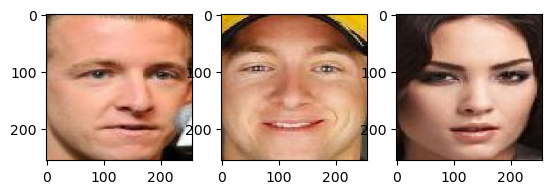

In [123]:
#Checking if correct 
for i in range(5):
    plt.subplot(1,3,1)
    plt.imshow(anchorImages[i])
    plt.subplot(1,3,2)
    plt.imshow(posImages[i])
    plt.subplot(1,3,3)
    plt.imshow(negImages[i])
    break

In [ ]:
# Your current model is quite shallow for face recognition
# Consider adding more depth and skip connections:

def FRmodel():
    inputs = tf.keras.Input(shape=(128, 128, 3), dtype=tf.float32)

    # Add more conv blocks with skip connections
    X = tf.keras.layers.Conv2D(64, 3, padding='same')(inputs)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.ReLU()(X)
    X = tf.keras.layers.MaxPooling2D(2)(X)

    # Deeper feature extraction
    for filters in [128, 256, 512]:
        residual = X
        X = tf.keras.layers.Conv2D(filters, 3, padding='same')(X)
        X = tf.keras.layers.BatchNormalization()(X)
        X = tf.keras.layers.ReLU()(X)
        X = tf.keras.layers.Conv2D(filters, 3, padding='same')(X)
        X = tf.keras.layers.BatchNormalization()(X)
        if residual.shape[-1] != filters:
            residual = tf.keras.layers.Conv2D(filters, 1)(residual)
        X = tf.keras.layers.Add()([X, residual])
        X = tf.keras.layers.ReLU()(X)
        X = tf.keras.layers.MaxPooling2D(2)(X)

    X = tf.keras.layers.GlobalAveragePooling2D()(X)
    X = tf.keras.layers.Dropout(0.5)(X)
    outputs = tf.keras.layers.Dense(512)(X)  # Larger embedding
    outputs = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(outputs)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = FRmodel()
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 252, 252, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 252, 252, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_27 (ReLU)                 │ (None, 252, 252, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 252, 252, 128)  │         8,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,440 (52.50 KB)

 Trainable params: 13,312 (52.00 KB)

 Non-trainable params: 128 (512.00 B)

In [245]:
# np.random.seed(0)
# anchor = tf.convert_to_tensor(np.random.randint(7, size=(3,128)),dtype = tf.float32)
# pos = tf.convert_to_tensor(np.random.randint(7, size=(3,128)),dtype = tf.float32)
# neg = tf.convert_to_tensor(np.random.randint(7, size=(3,128)),dtype = tf.float32)
def tripletLoss( y_pred , alpha):
    (anchor, pos, neg) = y_pred
    posDist = tf.reduce_sum(tf.square(tf.subtract(anchor,pos)),axis = -1)
    negDist = tf.reduce_sum(tf.square(tf.subtract(anchor,neg)),axis = -1)
    basic_loss = tf.subtract(posDist,negDist) + alpha
    loss = tf.reduce_sum(tf.maximum(basic_loss , 0),axis = None)
    return loss

In [246]:
class TripletModel(tf.keras.Model):
    def __init__(self, embedding_model, margin=0.2):
        super().__init__()
        self.embedding = embedding_model
        self.margin = margin

    def compile(self, optimizer):
        super().compile()
        self.optimizer = optimizer

    def train_step(self,data):
        anchor, pos, neg = data
        with tf.GradientTape() as tape:
            anchor_emb = self.embedding(anchor)
            pos_emb = self.embedding(pos)
            neg_emb = self.embedding(neg)
            loss = tripletLoss(y_pred = (anchor_emb , pos_emb , neg_emb),alpha = self.margin)
        grads = tape.gradient(loss, self.embedding.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.embedding.trainable_variables))
        return {"loss": loss}

tripletModel = TripletModel(model,0.2)

In [247]:
triplet_ds = tf.data.Dataset.from_tensor_slices((anchorImages, posImages, negImages))
# Step 2: Batch it
triplet_ds = triplet_ds.batch(32)

In [249]:
tripletModel.compile(optimizer=tf.keras.optimizers.Adam())
tripletModel.fit(triplet_ds, epochs=10)

Epoch 1/10


I0000 00:00:1753956547.200752    7925 service.cc:152] XLA service 0x7c7498028690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753956547.200776    7925 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-07-31 15:39:07.226905: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753956547.369100    7925 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-31 15:39:08.504798: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3', 168 bytes spill stores, 168 bytes spill loads

2025-07-31 15:39:08.850478: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 51390.4766 
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 42143.0859
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 37335.0859
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 34954.5781
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 33901.6875
Epoch 6/10


I0000 00:00:1753956553.652525    7925 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 33185.9922
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 32711.8398
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 32393.0156
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 32127.4961
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 31906.1426


In [251]:
def verify(image_path):
    image = tf.img_load(image_path,target_size = (256,256))

NotImplementedError: Exception encountered when calling TripletModel.call().

[1mModel TripletModel does not have a `call()` method implemented.[0m

Arguments received by TripletModel.call():
  • args=<class 'inspect._empty'>
  • kwargs=<class 'inspect._empty'>